In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/framingham-heart-study-dataset/framingham.csv


In [29]:
df= pd.read_csv('/kaggle/input/framingham-heart-study-dataset/framingham.csv')

In [30]:
df.shape

(4240, 16)

In [31]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [32]:
df=df.drop('education', axis=1)
df.rename(columns={'male': 'sex'}, inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.354599,22.033300,83.50,117.00,128.0,144.00,295.0


In [35]:
df.isna().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [36]:
df.dropna(axis=0, inplace = True)
df.isna().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

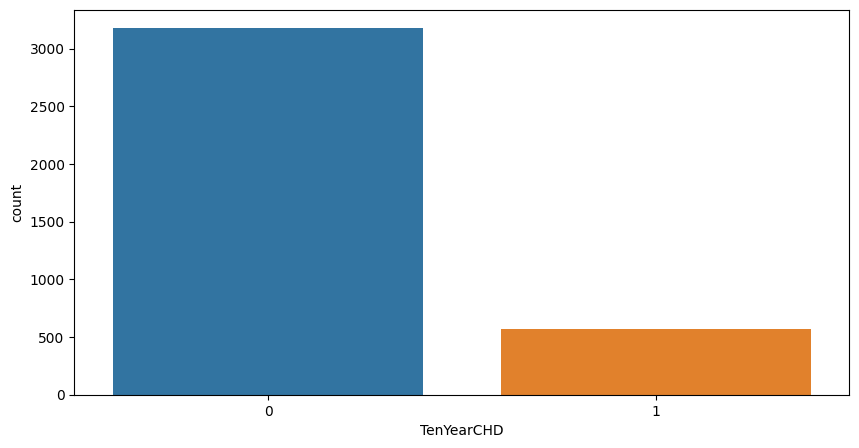

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'TenYearCHD', data=df)
plt.show()

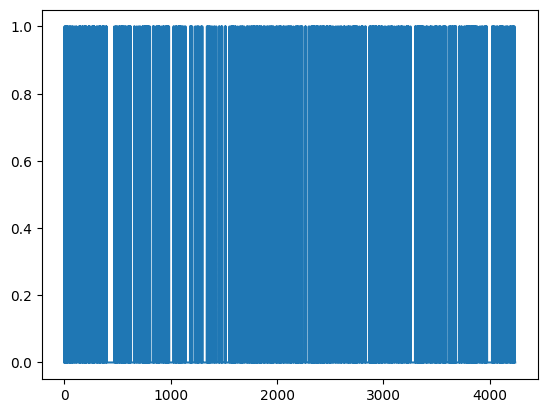

In [39]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X = np.asarray(df[['age', 'sex', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

In [42]:
scaler= StandardScaler()
x= scaler.fit(X).transform(X)

In [43]:
x_train, x_test, y_train , y_test= train_test_split(x, y, test_size= 0.2, random_state=2)

In [44]:
clf= LogisticRegression()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8561917443408789

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

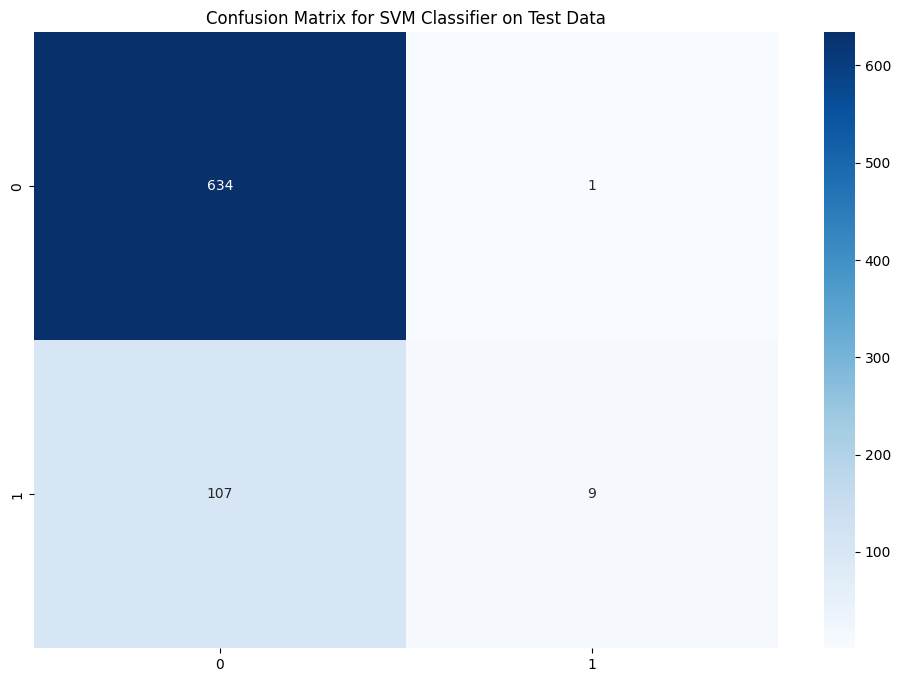

In [64]:
cf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap= 'Blues') 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

In [71]:
print('Details of confusion matrix:')
print(classification_report(y_test,y_pred))

Details of confusion matrix:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       635
           1       0.90      0.08      0.14       116

    accuracy                           0.86       751
   macro avg       0.88      0.54      0.53       751
weighted avg       0.86      0.86      0.80       751

